<a href="https://colab.research.google.com/github/hyp3r5pace/ML-notebooks/blob/main/XOR_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding neural nets (building a basic MLP for XOR operations and understanding backprop in the process)**

### **why do we need MLP?**

What is a perceptron or SLP? A perceptron is simply a linear binary classifier which can effectively classifiy between two classes which are linearly separable. But when it comes to non-linear classification, perceptron are ineffective. This can be seen in effect in case of XOR operations, which has two classes 0 and 1, and they are non linarly separable. Thus, a single line cannot separate between the two classes. A MLP is thus needed in such cases to effectively classify the two classes which are non-linearly classificable. 
We will try to understand how MLP works by taking the problem of XOR operation and try to build a MLP which can perform XOR operation.



## **XOR Operations**

XOR table


X             Y             output

0             0               0

1             0               1

0             1               1

1             1               0


Now, in the XOR table, there are two types of class values, 0 and 1. Now, these classes are not linearly classifiable. This is because, no single plane can classify between the two classes. The data points (1,0) and (0,1) belonging to class 1 lie between points (0,0) and (1,1) belonging to class 0. Thus, if we consider only a single classifier line, it will not be able to classify apart points beloning to class 1 from both the points of class 0.

This can be solved if we consider two lines, which collectively act as a binary classifier. One thing to consider in this case is that, activation function in this XOR classification is _heaviside step function_. This seems as the best activation for classification in case of XOR and also it helps in developing the intuition a lot easily. However, using sigmoid works too, which we will be using in this case as the dataset is very small and 100 % available for training weights.

**Doubt: the weights from input node to each of the hidden layer represents one of the two classifier line (actually a plane). Initally, if weights for both the lines are initalized randomly, then how we can be sure that after training, the new set of input weights will not represent the same classifier line? Couldn't understand how backprop handles that?**

So, our MLP for XOR problem will have:

For input layer --> 2 non-bias node and 1 bias node

Hidden layer --> 2 non bias node and 1 bias node

Output layer --> 1 node

Now let's code the MLP which can perform XOR operation. The MLP percieves the XOR problem as a classification problem, which is a correct valid perspective to the problem and works perfectly. 

When we do XOR operation, the rule learned (hypothesis) is matching both the input values, and if same then output is 0 otherwise 1. This algorithm is not learned by the MLP but what it learns is totally different hypothesis but finally both hypothesis gives the same result, thus are equivalent. In this case, MLP learns to map unequal input values to 1 and equal input values to 0.


next, code the MLP for XOR operation


In [34]:
# importing necessary modules

import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [35]:
trainingFeatureValues = [[0, 0], [0, 1], [1, 0], [1, 1]]
trainingClassValues = [0, 1, 1, 0]

In [36]:
class multiLayerPerceptron:
  def __init__(self, hiddenNodeWeights, outputNodeWeights, learningRate):
    self.hiddenNodeWeights = hiddenNodeWeights
    self.outputNodeWeights = outputNodeWeights
    self.learningRate = learningRate
    self.hiddenLayerOutput = [0, 0]
    self.outputLayerOutput = 0
  
  def linearCombination(self, weights, inputs):
    sum = 0
    for i in range(len(weights[:-1])):
      sum += (weights[i] * inputs[i])
    sum += weights[-1]
    return sum
  
  def activationFunction(self, sum):
    return (1 / (1 + math.exp(-1 * sum)))
  
  def calcHiddenLayerOutput(self, inputs):
    for i in range(len(self.hiddenLayerOutput)):
      sum = self.linearCombination(self.hiddenNodeWeights[i], inputs)
      self.hiddenLayerOutput[i] = self.activationFunction(sum)
  
  def calcOutputLayerOutput(self):
    sum = self.linearCombination(self.outputNodeWeights, self.hiddenLayerOutput)
    self.outputLayerOutput = self.activationFunction(sum)
  
  def forwardPass(self, input):
    self.calcHiddenLayerOutput(input)
    self.calcOutputLayerOutput()
  
  def trainWeights(self, featureValues, classValues, numOfEpochs):
    iterations = 0

    while (iterations <= numOfEpochs):
      outputLayerGradient = [0.0, 0.0, 0.0]
      hiddenLayerGradient = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
      for i in range(len(featureValues)):
        # forward pass
        self.forwardPass(featureValues[i])

        # backprop
        for j in range(len(outputLayerGradient[:-1])):
          outputLayerGradient[j] += (self.outputLayerOutput - classValues[i]) * self.hiddenLayerOutput[j]
        outputLayerGradient[-1] += (self.outputLayerOutput - classValues[i])

        for j in range(len(hiddenLayerGradient)):
          diff = (self.outputLayerOutput - classValues[i]) * self.outputNodeWeights[j]
          for k in range(len(hiddenLayerGradient[j][:-1])):
             hiddenLayerGradient[j][k] += diff * self.hiddenLayerOutput[j] * (1- self.hiddenLayerOutput[j]) * featureValues[i][k]
          hiddenLayerGradient[j][-1] += diff * self.hiddenLayerOutput[j] * (1 - self.hiddenLayerOutput[j])
      
      for i in range(len(self.outputNodeWeights)):
        self.outputNodeWeights[i] -= (self.learningRate / len(featureValues)) * outputLayerGradient[i]
      
      for i in range(len(self.hiddenNodeWeights)):
        for j in range(len(self.hiddenNodeWeights[i])):
          self.hiddenNodeWeights[i][j] -= (self.learningRate / len(featureValues)) * hiddenLayerGradient[i][j]
      
      iterations += 1
    

  def calcFinalClassValue(self, input):
    self.forwardPass(input)
    return (1 if (self.outputLayerOutput >= 0.5) else 0)

  def evaluation(self, featureValues, classValues):
    numOfMisclassification = 0
    for i in range(len(featureValues)):
      val = self.calcFinalClassValue(featureValues[i])
      if (val != classValues[i]): numOfMisclassification += 1
    return ((1 - (numOfMisclassification / len(featureValues))) * 100)


In [61]:
# creating a instance of MLP

hiddenNodeWeights = [[0.2] * 3] * 2
for i in range(len(hiddenNodeWeights)):
  for j in range(len(hiddenNodeWeights[i])):
    hiddenNodeWeights[i][j] = random.random()
  hiddenNodeWeights[i] = random.sample(hiddenNodeWeights[i], k = 3)

outputNodeWeights = [-0.1] * 3
for i in range(len(outputNodeWeights)):
  outputNodeWeights[i] = random.random()

accuracy = []

for epochs in range(1, 100000, 1000):
  XORnet = multiLayerPerceptron(hiddenNodeWeights,  outputNodeWeights, 0.0001)

  # training the MLP
  XORnet.trainWeights(trainingFeatureValues, trainingClassValues, epochs)

  # evaluation of the MLP
  accuracy.append(XORnet.evaluation(trainingFeatureValues, trainingClassValues))

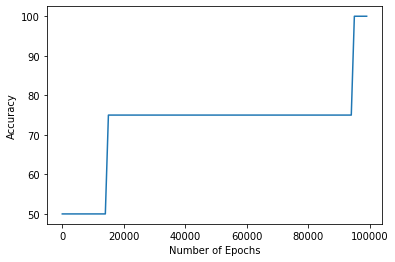

In [62]:
numOfEpochs = [i for i in range(1, 100000, 1000)]
plt.plot(numOfEpochs, accuracy)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.show()

In [65]:
# testing the XOR MLP
print("Input to hidden layer weights:")
print(XORnet.hiddenNodeWeights)
print("Hidden to output layer weights:")
print(XORnet.outputNodeWeights)
for input in trainingFeatureValues:
  print(input)
  print("Predicted output %d" %(XORnet.calcFinalClassValue(input)))

Input to hidden layer weights:
[[2.055341715204297, 2.045344033613403, -2.912232414720153], [5.134333295206039, 5.108969913689457, -1.5677425086387156]]
Hidden to output layer weights:
[-4.581707162072962, 5.4951270537147145, -2.6881786016364773]
[0, 0]
Predicted output 0
[0, 1]
Predicted output 1
[1, 0]
Predicted output 1
[1, 1]
Predicted output 0


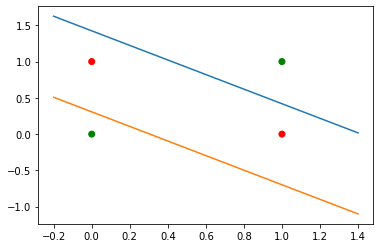

In [71]:
colour = ['red' if l == 1 else 'green' for l in trainingClassValues]
x_val = [i / 100 for i in range(-20, 150, 10)]
y_val = [(-1 * XORnet.hiddenNodeWeights[0][0] * i - XORnet.hiddenNodeWeights[0][2]) / XORnet.hiddenNodeWeights[0][1] for i in x_val]
y_val1 = [(-1 * XORnet.hiddenNodeWeights[1][0] * i - XORnet.hiddenNodeWeights[1][2]) / XORnet.hiddenNodeWeights[1][1] for i in x_val]
plt.scatter([0 , 0, 1, 1], [0, 1, 0, 1], color = colour)
plt.plot(x_val, y_val)
plt.plot(x_val, y_val1)
plt.show()